**Project name:- Pet Classification Model Using CNN**


***Importing All the Requred Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.preprocessing.image import load_img, ImageDataGenerator
import os
import random

In [3]:
data_gen = ImageDataGenerator()

In [4]:
# read the images from directory and classify them
train_images = data_gen.flow_from_directory(r'D:\1577957291_deeplearningwithkerasandtensorflow\data\train', classes=['dogs', 'cats'])

Found 40 images belonging to 2 classes.


In [5]:
# read the test images from directory and classify them
test_images = data_gen.flow_from_directory(r'C:\Users\rautn\Downloads\1577957291_deeplearningwithkerasandtensorflow\data\test', classes=['dogs', 'cats'])

Found 20 images belonging to 2 classes.


In [6]:
train_images

In [7]:
train_images.num_classes

2

In [8]:
train_images.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
train_images.image_shape

(256, 256, 3)

In [11]:
# list file names
fn_cats = os.listdir(r'C:\Users\rautn\Downloads\1577957291_deeplearningwithkerasandtensorflow\data\train\cats')
fn_dogs = os.listdir(r'C:\Users\rautn\Downloads\1577957291_deeplearningwithkerasandtensorflow\data\train\dogs')

In [12]:
# categorize 0 for cats and 1 for dogs
categories = []

for image in fn_cats:
    category = image.split('.')[0]
    categories.append(0)
  
for image in fn_dogs:
    category = image.split('.')[0]
    categories.append(1)
    
df = pd.DataFrame({'filename': fn_cats+fn_dogs,
                  'category': categories})

In [13]:
# cat = 0
# dog = 1

In [14]:
df.head(n=40)

,filename,category
0,1.jpg,0
1,10.jpg,0
2,11.jpg,0
3,12.jpg,0
4,13.jpg,0
5,14.jpg,0
6,15.jpg,0
7,16.jpg,0
8,17.jpg,0
9,18.jpg,0


<AxesSubplot:>

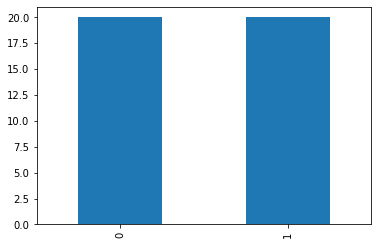

In [15]:
df.category.value_counts().plot.bar()

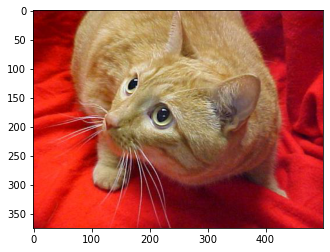

In [25]:
# view the cat random sample
sample_cat = random.choice(fn_cats)
image_cat = load_img(r'C:/Users/rautn/Downloads/1577957291_deeplearningwithkerasandtensorflow/data/train/cats/1'+ sample_cat)
plt.imshow(image_cat)

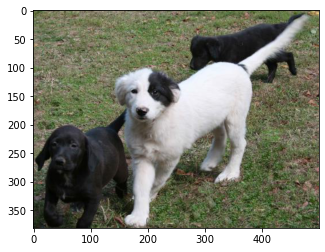

In [32]:
#view the dog random sample
sample_dog = random.choice(fn_dogs)
image_dog = load_img(r'C:\Users\rautn\Downloads\1577957291_deeplearningwithkerasandtensorflow\data\train\dogs\1'+ sample_dog)
plt.imshow(image_dog)

In [33]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (5,5), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [34]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())

In [35]:
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 122, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0

In [38]:
df['category'] = df['category'].replace({0:'cat', 1:'dog'})

<AxesSubplot:>

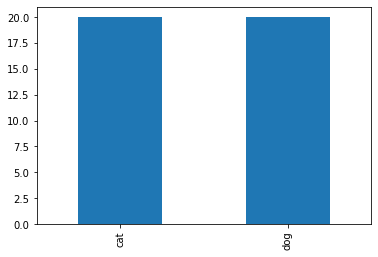

In [39]:
df.category.value_counts().plot.bar()

In [47]:
# list file names
fn_test_cats = os.listdir(r'C:\Users\rautn\Downloads\1577957291_deeplearningwithkerasandtensorflow\data\test\cats')
fn_test_dogs = os.listdir(r'C:\Users\rautn\Downloads\1577957291_deeplearningwithkerasandtensorflow\data\test\dogs')

In [48]:
# categorize 0 for cats and 1 for dogs for test data
categories = []

for image in fn_test_cats:
    category = image.split('.')[0]
    categories.append(0)
  
for image in fn_test_dogs:
    category = image.split('.')[0]
    categories.append(1)
    
df_test = pd.DataFrame({'filename': fn_test_cats+fn_test_dogs,
                  'category': categories})

<AxesSubplot:>

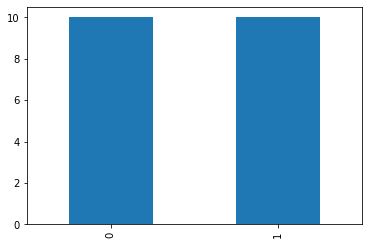

In [49]:
df_test.category.value_counts().plot.bar()

In [50]:
# converting into 0 = cat and 1 = dog
df_test.category = df_test.category.replace({0:'cat', 1:'dog'})

<AxesSubplot:>

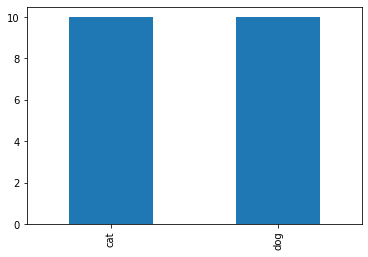

In [51]:
df_test.category.value_counts().plot.bar()

In [40]:
# fit the model
model_fit = model.fit(train_images, epochs=100, batch_size=10, validation_data=test_images)

Epoch 1/100
2/2 [==============================] - 3s 1s/step - loss: 1.8295 - accuracy: 0.3750 - val_loss: 242.9279 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 431ms/step - loss: 0.6261 - accuracy: 0.5750 - val_loss: 21.7269 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.4131 - accuracy: 0.8250 - val_loss: 29.1297 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 440ms/step - loss: 0.3612 - accuracy: 0.8500 - val_loss: 27.9635 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.2444 - accuracy: 0.9750 - val_loss: 19.9414 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.2830 - accuracy: 0.9000 - val_loss: 16.5101 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 0.2603 - accuracy: 0.8500 - val_loss: 8.7810 - val_accuracy: 0.5000
Epoch 8/100
2/2 [====

In [41]:
loss, accuracy = model.evaluate(test_images)

1/1 [==============================] - 0s 995us/step - loss: 1.1528 - accuracy: 0.5000


In [42]:
# fit the model - 200 iterations
model_fit_200 = model.fit(train_images, epochs=200, batch_size=10, validation_data=test_images)

Epoch 1/200
2/2 [==============================] - 2s 1s/step - loss: 0.0948 - accuracy: 0.9750 - val_loss: 1.2711 - val_accuracy: 0.4500
Epoch 2/200
2/2 [==============================] - 2s 1s/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 1.2613 - val_accuracy: 0.5500
Epoch 3/200
2/2 [==============================] - 1s 427ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.2738 - val_accuracy: 0.6500
Epoch 4/200
2/2 [==============================] - 2s 1s/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 1.0192 - val_accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 2s 1s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.0819 - val_accuracy: 0.6000
Epoch 6/200
2/2 [==============================] - 2s 1s/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 1.1954 - val_accuracy: 0.6500
Epoch 7/200
2/2 [==============================] - 1s 430ms/step - loss: 0.0761 - accuracy: 0.9500 - val_loss: 0.9405 - val_accuracy: 0.7000
Epoch 8/200
2/2 [===========

In [43]:
# loss and accuracy after 200 iterations
loss, accuracy = model.evaluate(test_images)

1/1 [==============================] - 0s 1ms/step - loss: 1.2200 - accuracy: 0.6000


**Accuracy is increased after 200 iterations. One reason could be less number of sample messages.**

In [55]:
# fit the model - 300 iterations
model_fit_300 = model.fit(train_images, epochs=300, batch_size=10, validation_data=test_images)

Epoch 1/300
2/2 [==============================] - 3s 1s/step - loss: 0.0306 - accuracy: 0.9750 - val_loss: 1.2527 - val_accuracy: 0.5500
Epoch 2/300
2/2 [==============================] - 1s 429ms/step - loss: 7.5219e-04 - accuracy: 1.0000 - val_loss: 1.2450 - val_accuracy: 0.5500
Epoch 3/300
2/2 [==============================] - 2s 1s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.2136 - val_accuracy: 0.5500
Epoch 4/300
2/2 [==============================] - 1s 399ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.1466 - val_accuracy: 0.6000
Epoch 5/300
2/2 [==============================] - 2s 1s/step - loss: 0.0969 - accuracy: 0.9750 - val_loss: 1.6907 - val_accuracy: 0.5500
Epoch 6/300
2/2 [==============================] - 1s 418ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.3690 - val_accuracy: 0.6000
Epoch 7/300
2/2 [==============================] - 1s 414ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.2871 - val_accuracy: 0.5500
Epoch 8/300
2/2 [=

In [56]:
# loss and accuracy after 300 iterations
loss, accuracy = model.evaluate(test_images)

1/1 [==============================] - 0s 998us/step - loss: 1.4829 - accuracy: 0.6000


In [45]:
pred = model.predict(test_images)

In [52]:
df_test['pred_category']  = np.argmax(pred, axis=1)

In [53]:
df_test['pred_category'] = df_test['pred_category'].replace({0:'cat', 1: 'dog'})

In [54]:
df_test.head(20)

,filename,category,pred_category
0,101.jpg,cat,cat
1,102.jpg,cat,cat
2,103.jpg,cat,cat
3,104.jpg,cat,cat
4,105.jpg,cat,cat
5,106.jpg,cat,dog
6,107.jpg,cat,cat
7,108.jpg,cat,cat
8,109.jpg,cat,dog
9,110.jpg,cat,dog
